In [1]:
%pylab inline

from nltk.corpus import stopwords
import wikipedia

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

Populating the interactive namespace from numpy and matplotlib


In [2]:
figsize(10, 8)
plt.style.use(['dark_background'])

In [3]:
stopw = stopwords.words("portuguese") +\
        stopwords.words("english")

## tf-idf

In [4]:
wikipedia.set_lang("pt")
text = wikipedia.page("Alan_Turing").content

In [5]:
tfidf = TfidfVectorizer(stop_words=stopw)

X = tfidf.fit_transform(text.splitlines())
X.shape

(61, 664)

In [6]:
X

<61x664 sparse matrix of type '<class 'numpy.float64'>'
	with 862 stored elements in Compressed Sparse Row format>

In [7]:
ft_name = tfidf.get_feature_names()

top_10_tfidf_sklearn = X[0].transpose().toarray().argsort(axis=0)[::-1]
for i in top_10_tfidf_sklearn[:10]:
    print(ft_name[i[0]])

computação
cheshire
junho
ciência
influente
algoritmo
east
lógico
desenvolvimento
desempenhando


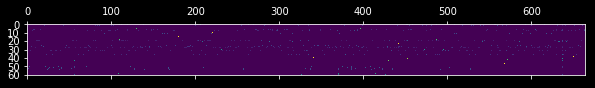

In [8]:
fig, ax = subplots(figsize=(10, 8))
ax.matshow(X.todense())
savefig("../images/lsa.png", transparent=True)

In [9]:
X.shape

(61, 664)

In [10]:
lsa = TruncatedSVD(n_components=61, n_iter=1000)

lsa.fit(X)

TruncatedSVD(algorithm='randomized', n_components=61, n_iter=1000,
       random_state=None, tol=0.0)

In [11]:
lsa.components_.shape

(61, 664)

In [12]:
ft_name = tfidf.get_feature_names()
ft_name[234]

'desenvolveu'

In [13]:
for i, comp in enumerate(lsa.components_):
    terms_in_comp = zip(ft_name, comp)
    sorted_terms = sorted(terms_in_comp, key=lambda x: x[1], reverse=True)[:10]
    print(f"paragrafo: {i}")
    for t in sorted_terms:
        print(t[0])
    print("-"*20)

paragrafo: 0
turing
máquina
alan
prêmio
memorial
guerra
enigma
bletchley
park
computação
--------------------
paragrafo: 1
inglês
isbn
cambridge
ed
history
massachusetts
mit
press
262
alan
--------------------
paragrafo: 2
morte
governo
ministro
pedido
perdão
anos
cianeto
britânico
devido
reino
--------------------
paragrafo: 3
alan
turing
memorial
prêmio
pai
genealogy
mathematics
project
família
havia
--------------------
paragrafo: 4
computação
ser
poderia
artificial
sistema
computabilidade
respostas
teórica
fazer
ciência
--------------------
paragrafo: 5
morte
pai
índia
família
havia
julius
sido
stoney
trabalho
maçã
--------------------
paragrafo: 6
morte
maçã
cianeto
alan
bletchley
park
junho
memorial
1954
meio
--------------------
paragrafo: 7
inglês
biografia
mactutor
genealogy
mathematics
project
bletchley
park
pai
família
--------------------
paragrafo: 8
química
onde
inglês
biografia
mactutor
laboratório
base
sobre
prêmio
interpretado
--------------------
paragrafo: 9
prêmio
m